**TEXT FOR SUBMISSION**

**1. What is in your data?**

Our data consists of election results, turnout, and winners from all Virginia districts in the 2023 November General and Special Elections. Key variables include candidates names, total votes for the candidate, candidate party, locality, office title, total voter turnout, total registered voters, and winner ballot name. In the election results data set, there are in total 19 variables with 66,269 observations. In the election turnout data set, there are in total 13 variables with 2,675 observations. In the election winner data set, there are in total 7 variables with 1,799 observations.

**2. How will these data be useful for studying the phenomenon you're interested in?**

The phenomenon we are studying is the rate of write in voters per county and if this metric is consistent across office titles. We will use these data sets to predict how many write-in votes will be cast in each county in this coming presidential election.

**3. What are the challenges you've resolved or expect to face in using them?**


In using this data, we expect to face challenges narrowing down the data to the parameters we are investigating. Additionally, the candidate name for each write in vote is "WRITE IN VOTES." It may become challenging differentiating between each county and office title as they have the same name for write in votes. Furthermore, these three data sets can not be directly joined making it more difficult to work with all of them at once. Luckily, there are no commas in the voting data that we will have to clean.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
df1 = pd.read_csv('2023_Virginia_Election_Results.csv')
df1.head()

,CandidateId,CandidateName,TOTAL_VOTES,Party,WriteInVote,LocalityCode,LocalityName,PrecinctId,PrecinctName,DistrictId,DistrictType,DistrictName,OfficeId,OfficeTitle,ElectionId,ElectionType,ElectionDate,ElectionName,NumberOfSeats
0,cs1565,Cedrick L. Cooper,428,NaN,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed5958,county,ACCOMACK COUNTY,cc956,Clerk of Court (Accomack County),NaN,General,2023-11-07,2023 November General and Special Elections,1
1,cs2354,Charlena Jones,379,Democratic,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed6085,state-house,100,cc1480,"Member, House of Delegates (100th District)",NaN,General,2023-11-07,2023 November General and Special Elections,1
2,cs2484,Connie C. Burford,529,NaN,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed6755,other,DISTRICT 1,cc1566,Member School Board (District 1),NaN,General,2023-11-07,2023 November General and Special Elections,1
3,cs2181,"J. Spencer Morgan, III",1067,NaN,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed5958,county,ACCOMACK COUNTY,cc1368,Commonwealth's Attorney (Accomack County),NaN,General,2023-11-07,2023 November General and Special Elections,1
4,cs1438,"James A. Lilliston, Sr.",1097,NaN,0,1,ACCOMACK COUNTY,0101,101 - CHINCOTEAGUE,ed5958,county,ACCOMACK COUNTY,cc888,Treasurer (Accomack County),NaN,General,2023-11-07,2023 November General and Special Elections,1


In [ ]:
df2 = pd.read_csv('2023_Virginia_Election_Turnout.csv')
df2.head()

,election,election_date,locality,precinct,Early Voting,Provisional,Election Day,Mailed Absentee,Post-Election,TotalVoteTurnout,ActiveRegisteredVoters,InactiveRegisteredVoters,TotalRegisteredVoters
0,2023 November General and Special Elections,11/07/2023 00:00:00,ACCOMACK COUNTY,101 - CHINCOTEAGUE,157.0,3.0,1035.0,110.0,10.0,1315.0,2788.0,206.0,2994.0
1,2023 November General and Special Elections,11/07/2023 00:00:00,ACCOMACK COUNTY,201 - ATLANTIC,79.0,3.0,371.0,14.0,3.0,470.0,949.0,50.0,999.0
2,2023 November General and Special Elections,11/07/2023 00:00:00,ACCOMACK COUNTY,202 - GREENBACKVILLE,96.0,5.0,627.0,57.0,6.0,791.0,1749.0,163.0,1912.0
3,2023 November General and Special Elections,11/07/2023 00:00:00,ACCOMACK COUNTY,301 - NEW CHURCH,260.0,8.0,537.0,109.0,6.0,920.0,2678.0,190.0,2868.0
4,2023 November General and Special Elections,11/07/2023 00:00:00,ACCOMACK COUNTY,401 - BLOXOM,66.0,NaN,350.0,14.0,1.0,431.0,1109.0,64.0,1173.0


In [ ]:
df3 = pd.read_csv('2023_Virginia_Election_Winners.csv')
df3.head()

,Locality,District,Office,PoliticalParty,BallotName,Seats,CandidateId
0,NaN,001,"Member, House of Delegates (1st District)",Democratic,Patrick A. Hope,1,cs1893
1,NaN,001,"Member, Senate of Virginia (1st District)",Republican,Timmy F. French,1,cs1351
2,NaN,002,"Member, House of Delegates (2nd District)",Democratic,Adele Y. McClure,1,cs181
3,NaN,002,"Member, Senate of Virginia (2nd District)",Republican,Mark D. Obenshain,1,cs1483
4,NaN,003,"Member, House of Delegates (3rd District)",Democratic,Alfonso H. Lopez,1,cs207


In [ ]:
print(df1.shape)

(66269, 19)


In [ ]:
print(df2.shape)

(2675, 13)


In [ ]:
print(df3.shape)

(1799, 7)


In [ ]:
df1.columns

Index(['CandidateId', 'CandidateName', 'TOTAL_VOTES', 'Party', 'WriteInVote',
       'LocalityCode', 'LocalityName', 'PrecinctId', 'PrecinctName',
       'DistrictId', 'DistrictType', 'DistrictName', 'OfficeId', 'OfficeTitle',
       'ElectionId', 'ElectionType', 'ElectionDate', 'ElectionName',
       'NumberOfSeats'],
      dtype='object')

In [ ]:
df2.columns

Index(['election', 'election_date', 'locality', 'precinct', 'Early Voting',
       'Provisional', 'Election Day', 'Mailed Absentee', 'Post-Election',
       'TotalVoteTurnout', 'ActiveRegisteredVoters',
       'InactiveRegisteredVoters', 'TotalRegisteredVoters'],
      dtype='object')

In [ ]:
df3.columns

Index(['Locality', 'District', 'Office', 'PoliticalParty', 'BallotName',
       'Seats', 'CandidateId'],
      dtype='object')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66269 entries, 0 to 66268
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CandidateId    66269 non-null  object 
 1   CandidateName  66269 non-null  object 
 2   TOTAL_VOTES    66269 non-null  int64  
 3   Party          10061 non-null  object 
 4   WriteInVote    66269 non-null  int64  
 5   LocalityCode   66269 non-null  int64  
 6   LocalityName   66269 non-null  object 
 7   PrecinctId     66269 non-null  object 
 8   PrecinctName   66269 non-null  object 
 9   DistrictId     66269 non-null  object 
 10  DistrictType   66269 non-null  object 
 11  DistrictName   66269 non-null  object 
 12  OfficeId       66269 non-null  object 
 13  OfficeTitle    66269 non-null  object 
 14  ElectionId     0 non-null      float64
 15  ElectionType   66269 non-null  object 
 16  ElectionDate   66269 non-null  object 
 17  ElectionName   66269 non-null  object 
 18  Number

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2675 entries, 0 to 2674
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   election                  2675 non-null   object 
 1   election_date             2675 non-null   object 
 2   locality                  2675 non-null   object 
 3   precinct                  2675 non-null   object 
 4   Early Voting              2520 non-null   float64
 5   Provisional               2159 non-null   float64
 6   Election Day              2526 non-null   float64
 7   Mailed Absentee           2522 non-null   float64
 8   Post-Election             2148 non-null   float64
 9   TotalVoteTurnout          2529 non-null   float64
 10  ActiveRegisteredVoters    2541 non-null   float64
 11  InactiveRegisteredVoters  2541 non-null   float64
 12  TotalRegisteredVoters     2541 non-null   float64
dtypes: float64(9), object(4)
memory usage: 271.8+ KB


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1799 entries, 0 to 1798
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Locality        1611 non-null   object
 1   District        1799 non-null   object
 2   Office          1799 non-null   object
 3   PoliticalParty  215 non-null    object
 4   BallotName      1799 non-null   object
 5   Seats           1799 non-null   int64 
 6   CandidateId     1799 non-null   object
dtypes: int64(1), object(6)
memory usage: 98.5+ KB


In [ ]:
df1['CandidateName'].value_counts()

,count
CandidateName,
WRITE IN VOTES,23220
Stacey Ann Kincaid,273
Christopher F. DeCarlo,273
Christopher J. Falcon,273
Gerarda Marie Culipher,273
...,...
E. Paige Cash,2
William Todd Jamerson,2
Kyle N. Rhodes,2


In [ ]:
import seaborn as sns

<Axes: xlabel='Party', ylabel='Count'>

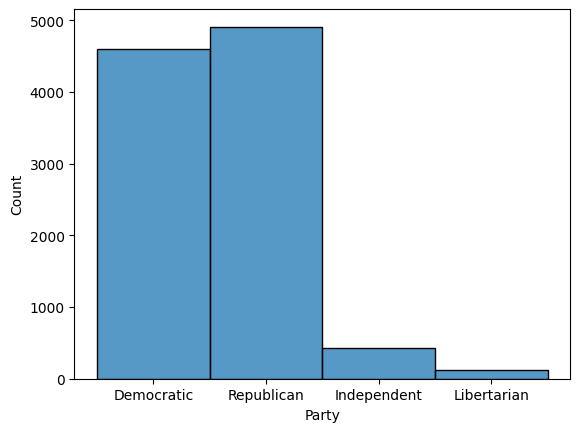

In [ ]:
sns.histplot(df1['Party'])

<Axes: xlabel='Count', ylabel='LocalityName'>

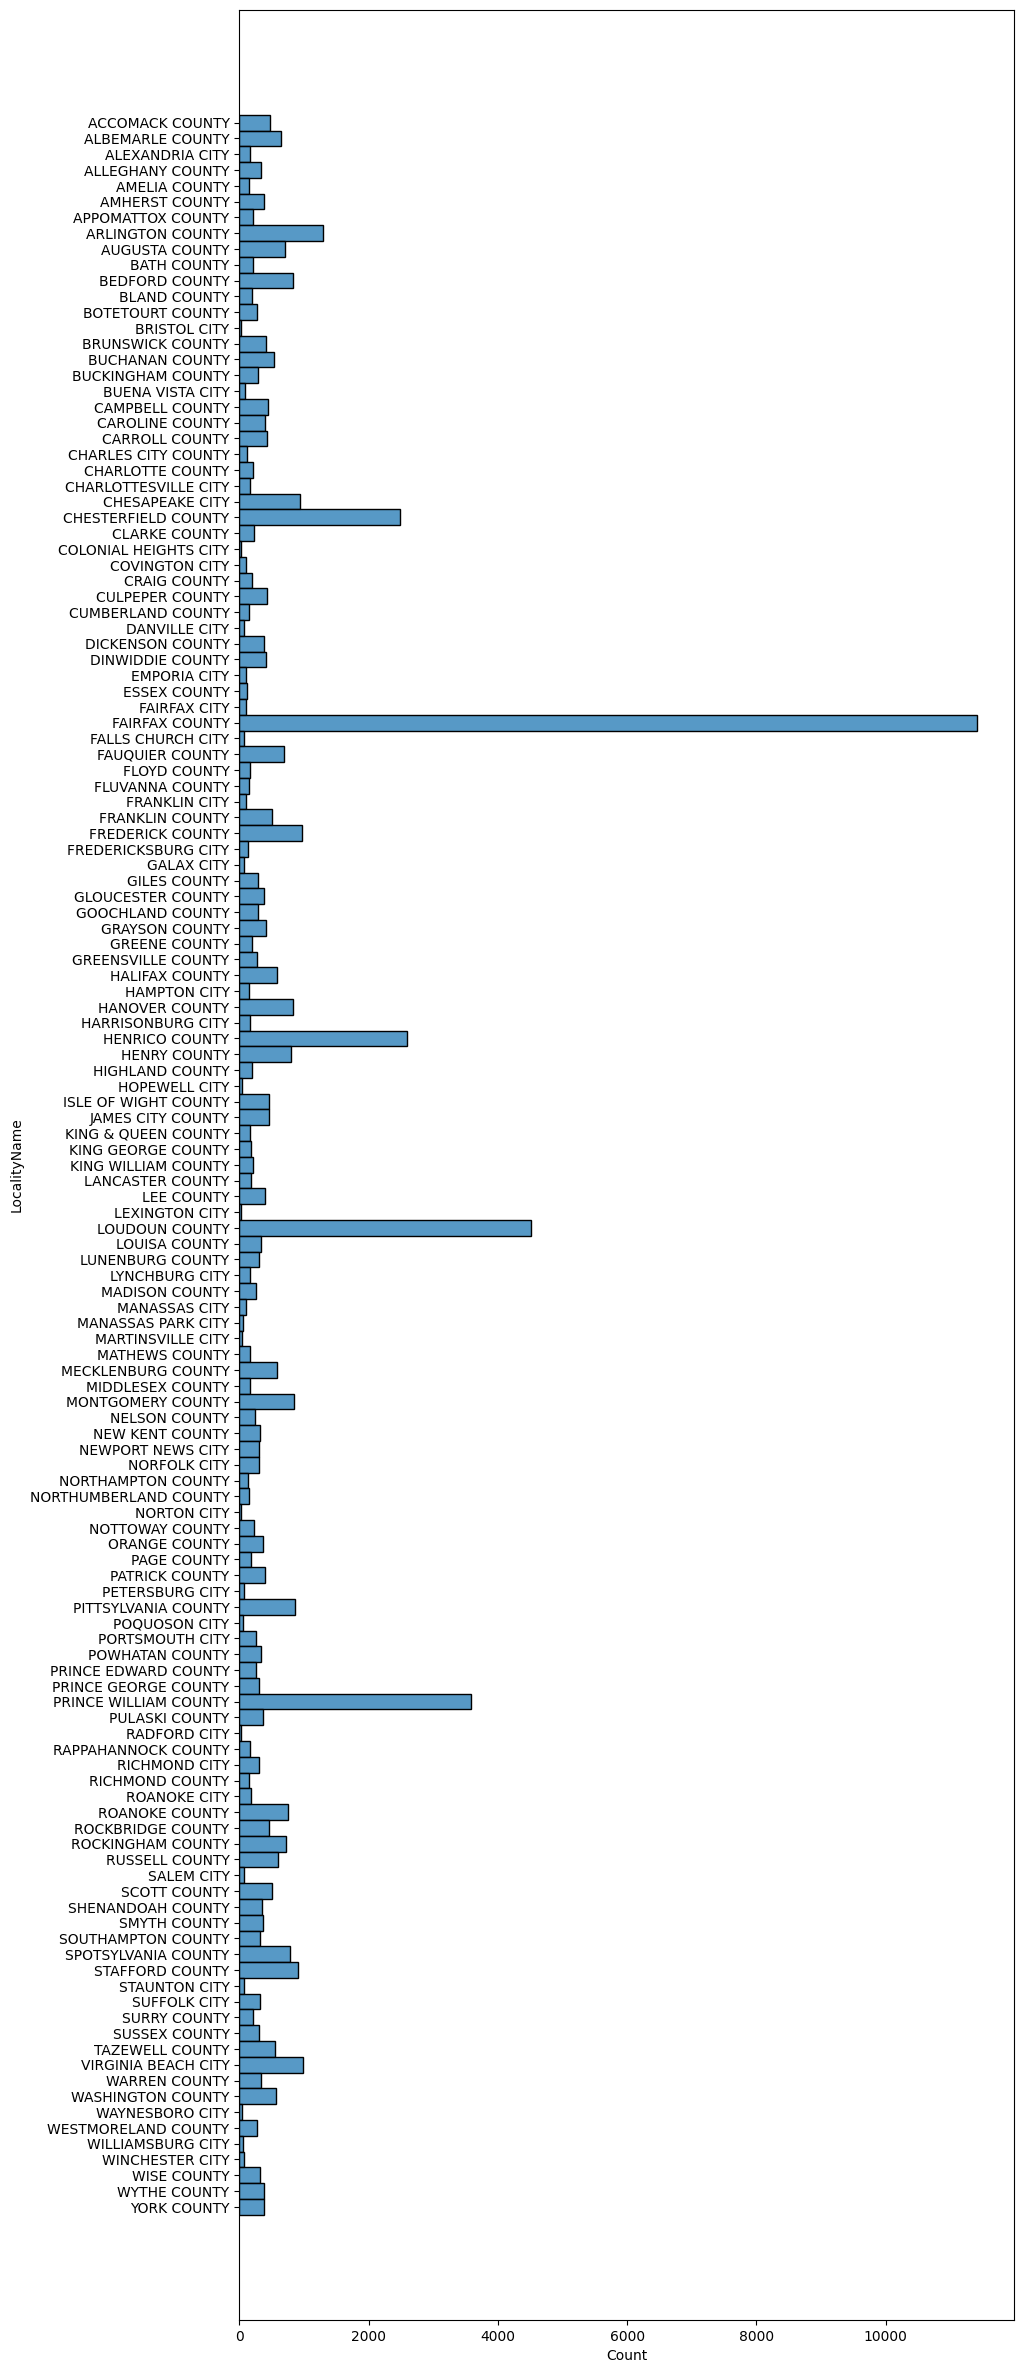

In [ ]:
plt.figure(figsize=(10,30))
sns.histplot(y=df1['LocalityName'])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: ylabel='Count'>

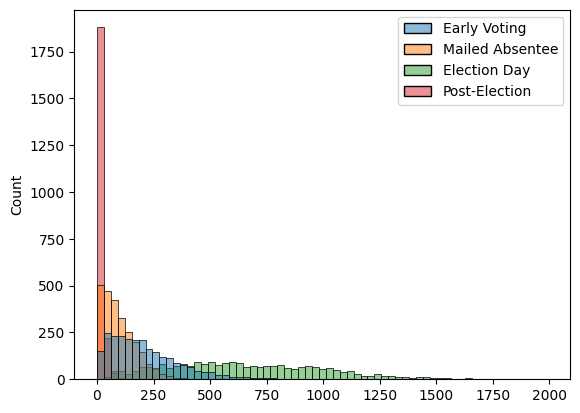

In [ ]:
sns.histplot(df2[['Early Voting', 'Mailed Absentee', 'Election Day', 'Post-Election']])

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

<Axes: ylabel='Count'>

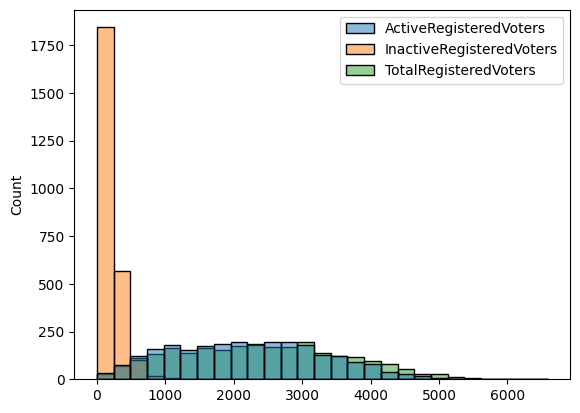

In [ ]:
sns.histplot(df2[['ActiveRegisteredVoters', 'InactiveRegisteredVoters', 'TotalRegisteredVoters']])

In [ ]:
df3.head()

,Locality,District,Office,PoliticalParty,BallotName,Seats,CandidateId
0,NaN,001,"Member, House of Delegates (1st District)",Democratic,Patrick A. Hope,1,cs1893
1,NaN,001,"Member, Senate of Virginia (1st District)",Republican,Timmy F. French,1,cs1351
2,NaN,002,"Member, House of Delegates (2nd District)",Democratic,Adele Y. McClure,1,cs181
3,NaN,002,"Member, Senate of Virginia (2nd District)",Republican,Mark D. Obenshain,1,cs1483
4,NaN,003,"Member, House of Delegates (3rd District)",Democratic,Alfonso H. Lopez,1,cs207
